### Notebook to compute and visualise transcriptional signatures of TB in each stage and tissue

- **Developed by**: Carlos Talavera-López Ph.D
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- v221018

### Load required modules

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

### Set up working environment

In [19]:
plt.show()

sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg', fontsize = 8)

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
cffi                        1.15.1
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.7.0
hypergeom_ufunc             NA
ipykernel                   6.9.1
jedi                        0.18.1
joblib                      1.2.0
kiwisolver                  1.4.4
llvmlite                    0.39.1
matplotlib                  3.6.1
matplotlib_inline           NA
mpl_toolkits                NA
natsort                     8.2.0
nbinom_ufunc                NA
ncf_ufunc                   NA
numba                       0.56.2
numpy                   

### Read in data

In [3]:
tb_pbmc = sc.read_h5ad('/home/cartalop/data/single_cell/lung/tb/working_objects/CaiY_TB-PBMC_scnym_annotated_ctl221017.h5ad')
tb_pbmc

AnnData object with n_obs × n_vars = 145381 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets', 'object', 'protocol', 'dataset', 'scNym', 'scNym_confidence', 'cell_type'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts-caiy2020', 'mean_counts-caiy2020', 'pct_dropout_by_counts-caiy2020', 'total_counts-caiy2020', 'n_cells_by_counts-caiy2022', 'mean_counts-caiy2022', 'pct_dropout_by_counts-caiy2022', 'total_counts-caiy2022'
    layers: 'counts', 'sqrt_norm'

### Remove irrelevant cell types

In [4]:
tb_pbmc.obs['scNym'].cat.categories

Index(['B invar', 'B n-sw mem', 'B n-sw mem IFN stim', 'B naive',
       'B naive IFN stim', 'B sw mem', 'Cycling', 'HPC', 'ILC', 'MAIT',
       'Monocyte CD14', 'Monocyte CD14 IFN stim', 'Monocyte CD16',
       'Monocyte CD16 IFN stim', 'Monocyte CD16+C1', 'NK', 'NK CD56',
       'NK IFN stim', 'Plasma cells', 'Plasmablasts', 'Platelets', 'RBC',
       'T CD4 CTL', 'T CD4 helper', 'T CD4 naive', 'T CD4 naive IFN stim',
       'T CD8 CM', 'T CD8 CTL', 'T CD8 EM', 'T CD8 EMRA', 'T CD8 naive',
       'T g/d', 'T reg', 'cDC2', 'pDC'],
      dtype='object')

In [5]:
tb_pbmc.obs['cell_type'].cat.categories

Index(['CD14+Mono', 'CD16+Mono', 'Cycling', 'HPC', 'ILC', 'MAIT', 'NK',
       'Plasma_B', 'Plasmablasts', 'Platelets', 'RBC', 'Treg', 'cDC2',
       'cmCD8+T', 'ctlCD4+T', 'ctlCD8+T', 'emCD8+T', 'emraCD8+T', 'gdT',
       'hCD4+T', 'mB_cells', 'nB_cells', 'nCD4+T', 'nCD8+T', 'pDC'],
      dtype='object')

### Identify cell signatures per cell_type

In [6]:
tb_pbmc.raw.shape

(145381, 61533)

In [7]:
sc.tl.rank_genes_groups(tb_pbmc, 'cell_type', method = 'wilcoxon', n_genes = 200, use_raw = True)
result = tb_pbmc.uns['rank_genes_groups']
groups = result['names'].dtype.names
markers_cells = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})
markers_cells.head(10)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:14:09)


/home/cartalop/mambaforge/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/cartalop/mambaforge/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/cartalop/mambaforge/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is high

,CD14+Mono_n,CD14+Mono_p,CD14+Mono_l,CD16+Mono_n,CD16+Mono_p,CD16+Mono_l,Cycling_n,Cycling_p,Cycling_l,HPC_n,...,nB_cells_l,nCD4+T_n,nCD4+T_p,nCD4+T_l,nCD8+T_n,nCD8+T_p,nCD8+T_l,pDC_n,pDC_p,pDC_l
0,LYZ,0.0,6.132692,AIF1,0.0,9.573433,STMN1,2.182303e-213,10.250038,SNHG29,...,6.925390,ENSG00000272256,0.0,4.022029,CD8B,0.0,8.561157,SERPINF1,2.782280e-97,11.966520
1,VCAN,0.0,6.222081,LST1,0.0,9.909992,TUBA1B,2.058487e-207,8.662915,RPS24,...,9.824313,ENSG00000225840,0.0,4.625053,RPS12,0.0,4.239684,CD74,8.284301e-91,7.026832
2,FCN1,0.0,5.209589,FCER1G,0.0,9.087584,TUBB,5.285185e-191,8.498446,STMN1,...,8.512400,BTG1-DT,0.0,3.363207,RPL32,0.0,4.726154,TCF4,6.718992e-90,9.548053
3,ENSG00000257764,0.0,6.567174,PSAP,0.0,8.615166,HMGB2,7.710138e-190,8.130149,TSC22D1,...,6.261778,ENSG00000243004,0.0,3.330658,RPS6,0.0,5.000885,ITM2C,3.672036e-88,10.433426
4,PSAP,0.0,3.740045,SERPINA1,0.0,9.375010,GAPDH,8.988312e-148,6.062358,SOX4,...,8.765656,ENSG00000273149,0.0,3.365986,RPL34,0.0,4.964365,JCHAIN,2.097485e-87,9.325889
5,NAMPT,0.0,4.455252,IFITM3,0.0,9.146008,MKI67,8.956418e-144,11.046337,GIHCG,...,7.748569,ENSG00000266865,0.0,3.797045,RPS3A,0.0,5.011253,BCL11A,9.581053e-83,8.781119
6,MNDA,0.0,5.016165,FCGR3A,0.0,9.269747,H2AZ1,1.456855e-140,6.621530,HNRNPA1,...,6.427197,ENSG00000203396,0.0,3.532471,RPS18,0.0,4.906045,LILRA4,1.586776e-82,13.720317
7,CST3,0.0,4.649084,FTL,0.0,7.387430,ACTB,1.254616e-133,3.830701,GAS5,...,6.431231,ENSG00000227766,0.0,3.193947,RPLP2,0.0,4.901248,IRF7,7.731276e-79,9.056376
8,JSRP1,0.0,3.702051,SAT1,0.0,8.199835,HMGN2,1.827739e-132,6.041577,RPL15,...,4.217117,RPL4,0.0,0.320163,RPS28,0.0,4.167325,GZMB,2.013755e-75,8.631956
9,AIF1,0.0,3.982788,CTSS,0.0,8.023637,PCLAF,1.845056e-132,9.146323,ZFAS1,...,8.165127,ENSG00000245970,0.0,2.623785,RPL31,0.0,5.267612,IRF8,1.024618e-74,8.799849


/home/cartalop/mambaforge/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


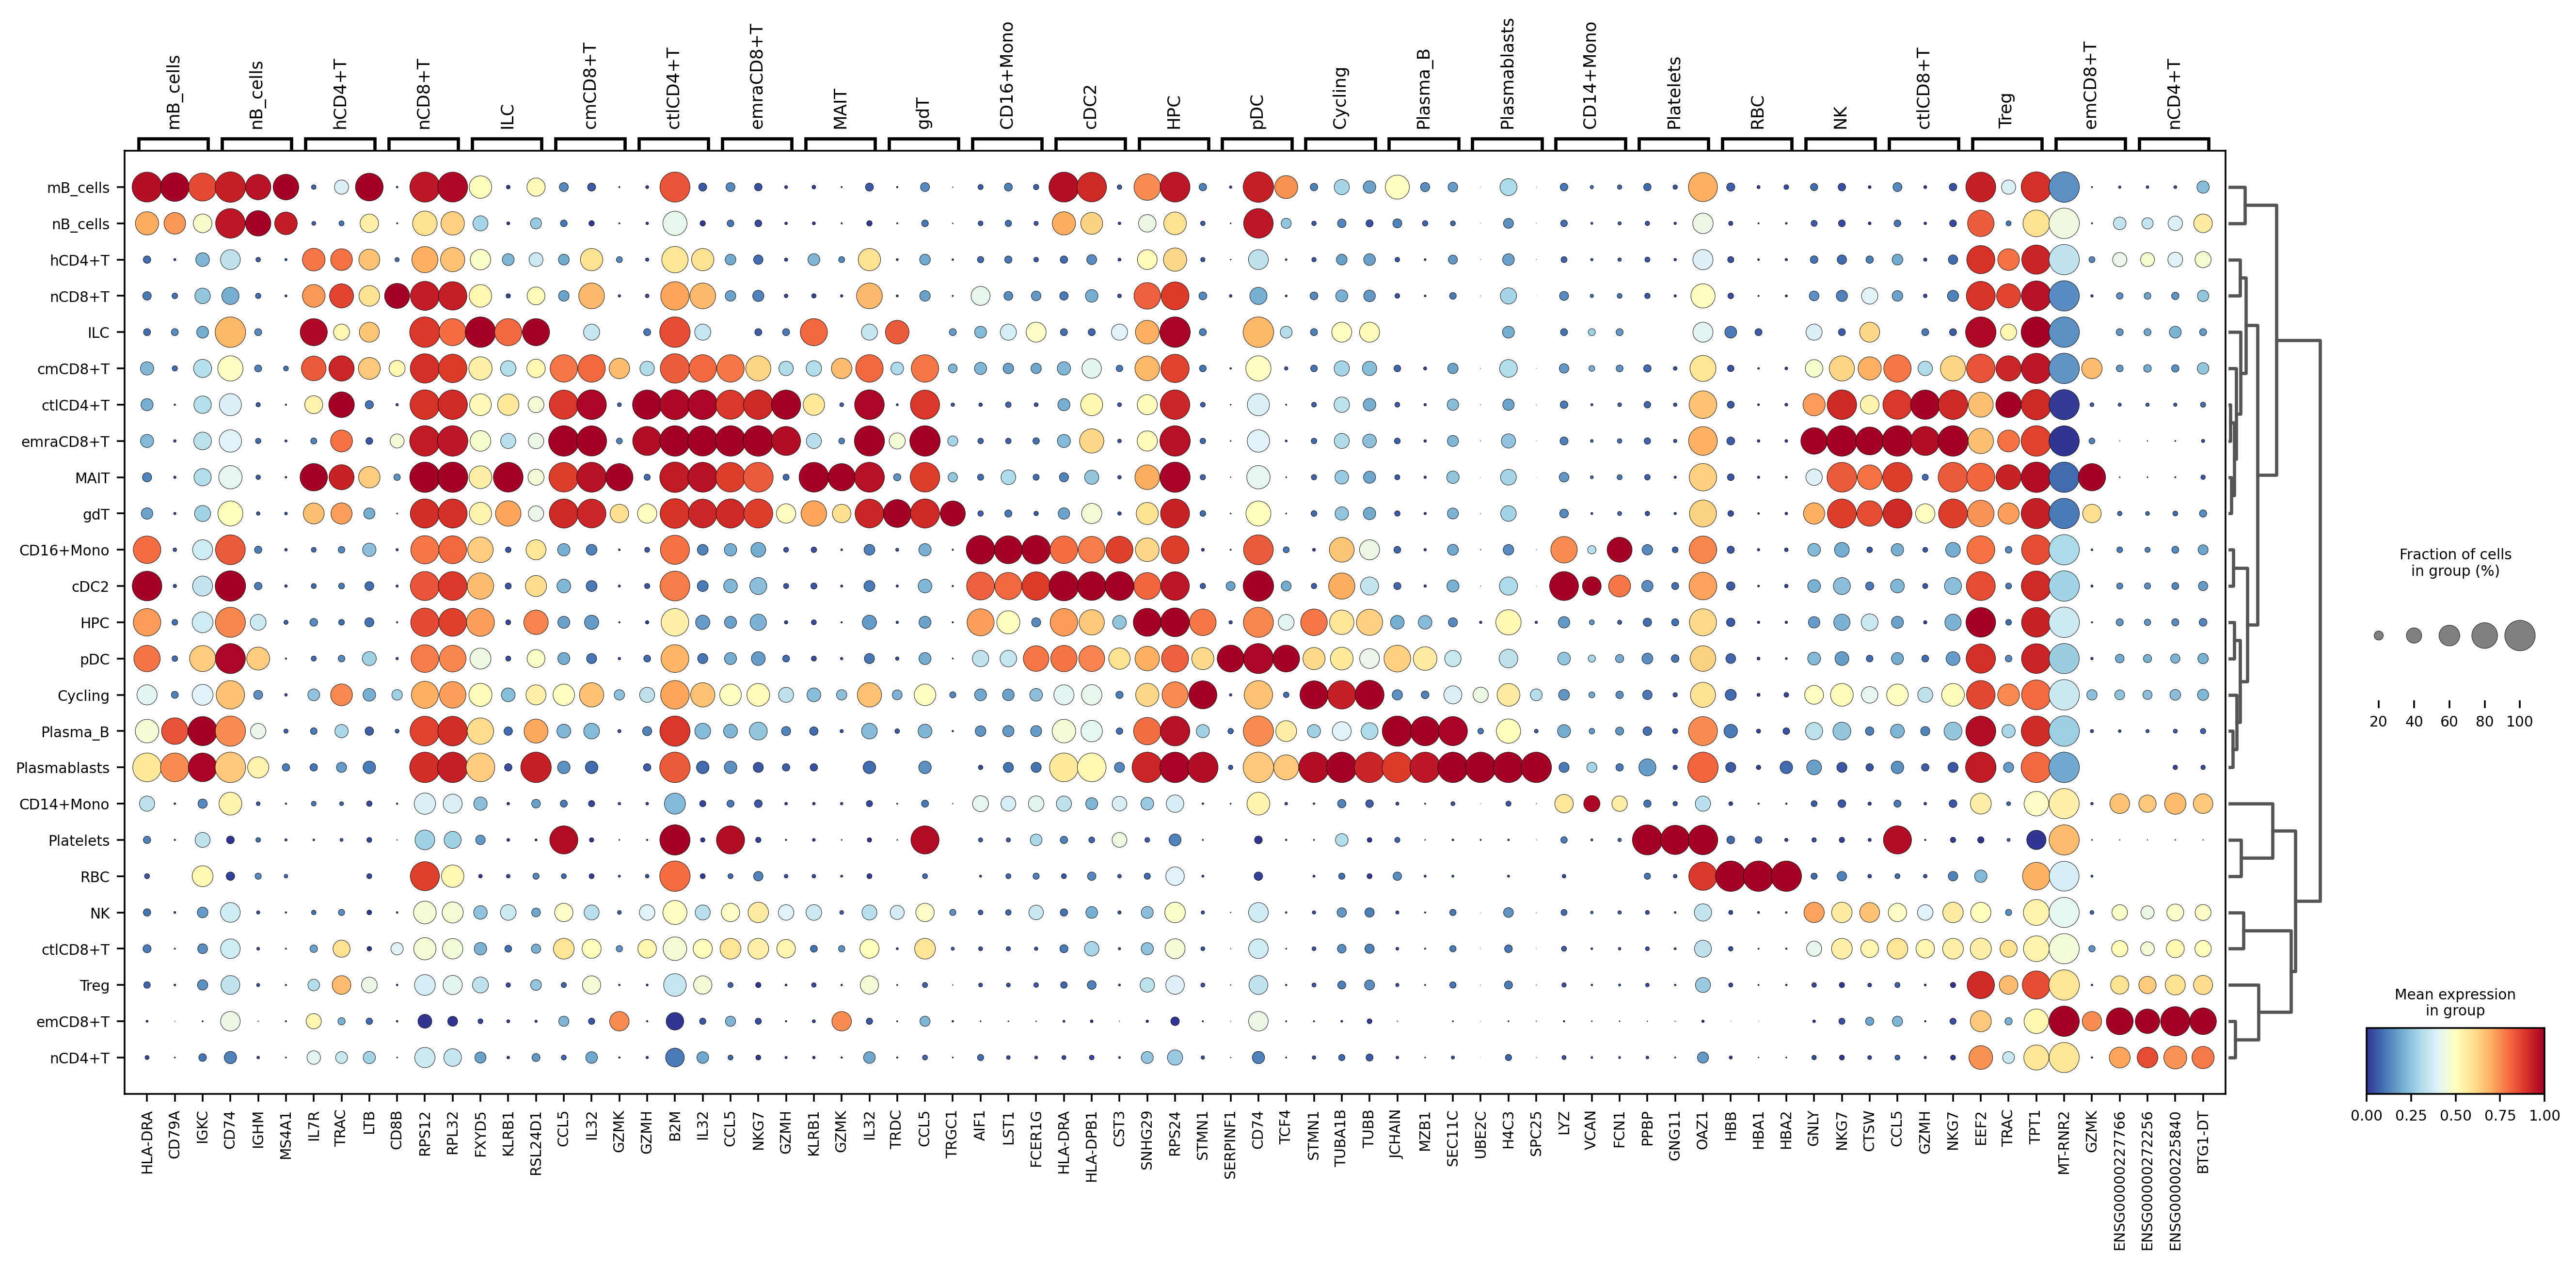

In [25]:
sc.pl.rank_genes_groups_dotplot(tb_pbmc, n_genes = 3, standard_scale = 'var', cmap = 'RdYlBu_r', figsize = (20, 8))

### Identify cell signature per TB stage

In [26]:
tb_pbmc.obs['tissue'].cat.categories

Index(['PBMC', 'PFMC'], dtype='object')

In [27]:
pfmc = tb_pbmc[tb_pbmc.obs['tissue'].isin(['PFMC'])] 
pfmc

View of AnnData object with n_obs × n_vars = 44781 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets', 'object', 'protocol', 'dataset', 'scNym', 'scNym_confidence', 'cell_type'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts-caiy2020', 'mean_counts-caiy2020', 'pct_dropout_by_counts-caiy2020', 'total_counts-caiy2020', 'n_cells_by_counts-caiy2022', 'mean_counts-caiy2022', 'pct_dropout_by_counts-caiy2022', 'total_counts-caiy2022'
    uns: 'rank_genes_groups', 'dendrogram_cell_type'
    obsm: 'X_pca'
    layers: 'counts', 'sqrt_norm'

In [28]:
pbmc = tb_pbmc[tb_pbmc.obs['tissue'].isin(['PBMC'])] 
pbmc

View of AnnData object with n_obs × n_vars = 100600 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets', 'object', 'protocol', 'dataset', 'scNym', 'scNym_confidence', 'cell_type'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts-caiy2020', 'mean_counts-caiy2020', 'pct_dropout_by_counts-caiy2020', 'total_counts-caiy2020', 'n_cells_by_counts-caiy2022', 'mean_counts-caiy2022', 'pct_dropout_by_counts-caiy2022', 'total_counts-caiy2022'
    uns: 'rank_genes_groups', 'dendrogram_cell_type'
    obsm: 'X_pca'
    layers: 'counts', 'sqrt_norm'

In [29]:
healthy_pbmc = pbmc[pbmc.obs['status'].isin(['Healthy'])] 
healthy_pbmc

View of AnnData object with n_obs × n_vars = 22049 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets', 'object', 'protocol', 'dataset', 'scNym', 'scNym_confidence', 'cell_type'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts-caiy2020', 'mean_counts-caiy2020', 'pct_dropout_by_counts-caiy2020', 'total_counts-caiy2020', 'n_cells_by_counts-caiy2022', 'mean_counts-caiy2022', 'pct_dropout_by_counts-caiy2022', 'total_counts-caiy2022'
    uns: 'rank_genes_groups', 'dendrogram_cell_type'
    obsm: 'X_pca'
    layers: 'counts', 'sqrt_norm'

In [30]:
active_pbmc = pbmc[pbmc.obs['status'].isin(['active_TB'])] 
active_pbmc

View of AnnData object with n_obs × n_vars = 60558 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets', 'object', 'protocol', 'dataset', 'scNym', 'scNym_confidence', 'cell_type'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts-caiy2020', 'mean_counts-caiy2020', 'pct_dropout_by_counts-caiy2020', 'total_counts-caiy2020', 'n_cells_by_counts-caiy2022', 'mean_counts-caiy2022', 'pct_dropout_by_counts-caiy2022', 'total_counts-caiy2022'
    uns: 'rank_genes_groups', 'dendrogram_cell_type'
    obsm: 'X_pca'
    layers: 'counts', 'sqrt_norm'

In [31]:
latent_pbmc = pbmc[pbmc.obs['status'].isin(['latent_TB'])] 
latent_pbmc

View of AnnData object with n_obs × n_vars = 17993 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets', 'object', 'protocol', 'dataset', 'scNym', 'scNym_confidence', 'cell_type'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts-caiy2020', 'mean_counts-caiy2020', 'pct_dropout_by_counts-caiy2020', 'total_counts-caiy2020', 'n_cells_by_counts-caiy2022', 'mean_counts-caiy2022', 'pct_dropout_by_counts-caiy2022', 'total_counts-caiy2022'
    uns: 'rank_genes_groups', 'dendrogram_cell_type'
    obsm: 'X_pca'
    layers: 'counts', 'sqrt_norm'

In [34]:
healthy_pbmc.obs['cell_type'].value_counts()

NK              5245
nCD4+T          3689
CD14+Mono       2390
hCD4+T          2183
nCD8+T          1930
ctlCD8+T        1266
mB_cells         775
CD16+Mono        769
nB_cells         725
emraCD8+T        545
MAIT             527
gdT              517
cmCD8+T          449
Treg             302
cDC2             203
Plasma_B         158
Cycling          145
ctlCD4+T          75
pDC               66
Platelets         62
HPC               15
RBC                7
ILC                3
emCD8+T            2
Plasmablasts       1
Name: cell_type, dtype: int64

In [35]:
healthy_pbmc = healthy_pbmc[~healthy_pbmc.obs['cell_type'].isin(['Plasmablasts', 'emCD8+T '])]

In [36]:
sc.tl.rank_genes_groups(healthy_pbmc, 'cell_type', method = 'wilcoxon', n_genes = 200, use_raw = True)
result = healthy_pbmc.uns['rank_genes_groups']
groups = result['names'].dtype.names
markers_cells = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})
markers_cells.head(10)

ranking genes


/home/cartalop/mambaforge/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:59)


/home/cartalop/mambaforge/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/cartalop/mambaforge/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/cartalop/mambaforge/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is high

,CD14+Mono_n,CD14+Mono_p,CD14+Mono_l,CD16+Mono_n,CD16+Mono_p,CD16+Mono_l,Cycling_n,Cycling_p,Cycling_l,HPC_n,...,nB_cells_l,nCD4+T_n,nCD4+T_p,nCD4+T_l,nCD8+T_n,nCD8+T_p,nCD8+T_l,pDC_n,pDC_p,pDC_l
0,S100A9,0.0,8.683721,LST1,0.0,9.653944,TUBA1B,2.439875e-78,7.536192,RPS24,...,6.057692,RPL34,0.0,0.563493,CD8B,0.0,8.063921,ITM2C,2.400176e-38,11.373441
1,S100A8,0.0,9.430541,AIF1,0.0,9.012012,STMN1,2.033562e-71,9.539912,SNHG29,...,10.935382,RPS27,0.0,0.486091,RPL32,0.0,0.887757,TCF4,1.984359e-37,11.024153
2,LYZ,0.0,10.385499,IFITM3,0.0,9.040812,H2AZ1,4.293643e-67,6.252494,GIHCG,...,11.745023,RPL32,0.0,0.525114,RPS6,0.0,1.004554,LILRA4,2.356406e-35,14.619052
3,S100A6,0.0,3.767013,PSAP,0.0,7.688752,PCLAF,7.068494e-65,10.381410,GAS5,...,8.638861,RPS27A,0.0,0.428242,RPS12,0.0,0.891295,IRF7,6.225431e-35,9.938639
4,FTL,0.0,3.102854,SAT1,0.0,7.451077,TUBB,2.266111e-61,6.698673,STMN1,...,9.101574,RPS15A,0.0,0.397122,RPS3A,0.0,1.092914,SERPINF1,5.537982e-34,12.366230
5,FCN1,0.0,9.582667,SERPINA1,0.0,9.594199,GAPDH,2.561209e-60,3.093750,SOX4,...,11.901171,RPS12,0.0,0.567983,RPL34,0.0,0.803592,CD74,6.096364e-33,5.720535
6,TYROBP,0.0,6.684799,MS4A7,0.0,10.103507,HMGB2,8.945477e-59,7.298200,SMIM24,...,6.543155,RPLP2,0.0,0.457780,LINC02446,0.0,8.107474,JCHAIN,1.148699e-32,9.495961
7,GPX1,0.0,7.343224,CTSS,0.0,7.558743,PTMA,1.739704e-57,1.440616,PRSS57,...,7.530026,RPS25,0.0,0.490522,RPS13,0.0,0.982799,BCL11A,1.443194e-32,10.192454
8,S100A12,0.0,10.020037,FTL,0.0,3.072928,HMGN2,2.965325e-56,5.543652,RACK1,...,4.388803,RPS6,0.0,0.526256,RPS14,0.0,0.665893,UGCG,2.224317e-32,11.119273
9,CTSS,0.0,7.120602,FCER1G,0.0,7.283543,RAN,7.289328e-51,4.942725,TSC22D1,...,11.798973,RPL30,0.0,0.452107,RPL21,0.0,1.091373,IRF8,3.772518e-32,10.490091


In [38]:
sc.tl.dendrogram(healthy_pbmc, groupby = 'cell_type')
sc.pl.rank_genes_groups_dotplot(healthy_pbmc, n_genes = 3, standard_scale = 'var', cmap = 'RdYlBu_r', figsize = (20, 8))

TypeError: dendrogram() missing 1 required positional argument: 'groupby'

In [ ]:
data = pd.crosstab(tb_pbmc.obs['cell_type'], tb_pbmc.obs['tissue'])
totals = data.sum(axis = 1)
percent = data.div(totals, axis = 0).mul(100).round(2)

ax1 = percent.plot.barh(stacked = False, edgecolor = 'none', zorder = 3, figsize = (10,8), fontsize = 8, grid = False, width = 0.6)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 1)

for c in ax1.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax1.bar_label(c, labels = labels, label_type = 'edge', padding = 1, color = 'black', rotation = 0, fontsize = 4)

In [ ]:
ax1 = pd.crosstab(tb_pbmc.obs['cell_type'], tb_pbmc.obs['status']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (8,6), fontsize = 10, grid = False, width = 0.8)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 3)

In [ ]:
ax1 = pd.crosstab(sc_copd.obs['scNym'], sc_copd.obs['group']).plot.barh(stacked = False, edgecolor = 'none', zorder = 3, figsize = (14,8), fontsize = 8, grid = False, width = 0.8)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 1)

In [ ]:
table = pd.crosstab(sc_copd.obs['scNym'], sc_copd.obs['group'])
table_melted = pd.melt(table)
table_melted.head()

In [ ]:
sns.boxplot(x = "group", y = "value", data = table_melted)

In [ ]:
tb_pbmc.write('/home/cartalop/data/single_cell/lung/tb/working_objects/CaiY_TB-PBMC_scnym_annotated_ctl221017.h5ad')